In [71]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("CASE STUDY.csv", encoding='cp1252')

In [73]:
df.head()

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Unnamed: 5,Reporter,Assigned To,Department,Category,location or School,Contact Person,Call Mode,Caller Type,Issue Priority,Telephone Number,Resolved date,Resolved time,Resolved by,Closed date,Closed time,Closed by
0,2-Jan-18,7:16:20,3-Jan-18,1328758,Closed,NaN,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Ng’iya-SYA,Caroline Achieng Onyango,NaN,Academy Manager,Priority 2,2.547160e+11,3-Jan-18,9:12:27,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru
1,2-Jan-18,7:16:29,10-Jan-18,1328759,Closed,NaN,leah.waweru,leah.waweru,Smartphone,Software - Application Uninstalled,Gongoni-KLF,Dennis Rapando,NaN,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,14:36:50,Joseph.Achieng,10-Jan-18,11:52:48,Angela.Kabuchoru
2,2-Jan-18,7:18:27,3-Jan-18,1328761,Closed,NaN,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Gongoni-KLF,Dennis Rapando,NaN,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,13:52:54,Joseph.Achieng,3-Jan-18,8:13:48,leah.waweru
3,2-Jan-18,7:18:54,5-Jan-18,1328762,Closed,NaN,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Kehancha-MIG,John Mwana,NaN,Academy Manager,Priority 2,2.547020e+11,2-Jan-18,13:55:23,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru
4,2-Jan-18,7:23:53,3-Jan-18,1328764,Closed,NaN,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Panama-USG,Millicent Ambani,NaN,Academy Manager,Priority 2,2.547060e+11,2-Jan-18,13:54:31,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru


In [74]:
df.shape

(13817, 22)

In [75]:
df.dtypes

Date Submitted         object
Time Submitted         object
Last Updated           object
Reference Number        int64
Status                 object
Unnamed: 5            float64
Reporter               object
Assigned To            object
Department             object
Category               object
location or School     object
Contact Person         object
Call Mode             float64
Caller Type            object
Issue Priority         object
Telephone Number      float64
Resolved date          object
Resolved time          object
Resolved by            object
Closed date            object
Closed time            object
Closed by              object
dtype: object

In [76]:
df.isnull().sum()

Date Submitted            0
Time Submitted            0
Last Updated              0
Reference Number          0
Status                    0
Unnamed: 5            13817
Reporter                  0
Assigned To               0
Department                0
Category                 20
location or School       37
Contact Person           42
Call Mode             13817
Caller Type              37
Issue Priority            9
Telephone Number         37
Resolved date          8156
Resolved time          8156
Resolved by            8156
Closed date            1835
Closed time            1835
Closed by              1835
dtype: int64

In [77]:
#Dropping irrelevant columns and taking the relevant ones needed for our analysis
subset_df = df[["Date Submitted", "Time Submitted", "Last Updated", "Reference Number", "Status", "Reporter", "Assigned To", "Department", "Category", "location or School", "Contact Person", "Caller Type", "Issue Priority", "Telephone Number", "Resolved date", "Resolved by", "Closed date", "Closed time", "Closed by"]]

In [78]:
subset_df.head()

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Reporter,Assigned To,Department,Category,location or School,Contact Person,Caller Type,Issue Priority,Telephone Number,Resolved date,Resolved by,Closed date,Closed time,Closed by
0,2-Jan-18,7:16:20,3-Jan-18,1328758,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Ng’iya-SYA,Caroline Achieng Onyango,Academy Manager,Priority 2,2.547160e+11,3-Jan-18,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru
1,2-Jan-18,7:16:29,10-Jan-18,1328759,Closed,leah.waweru,leah.waweru,Smartphone,Software - Application Uninstalled,Gongoni-KLF,Dennis Rapando,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,Joseph.Achieng,10-Jan-18,11:52:48,Angela.Kabuchoru
2,2-Jan-18,7:18:27,3-Jan-18,1328761,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Gongoni-KLF,Dennis Rapando,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,Joseph.Achieng,3-Jan-18,8:13:48,leah.waweru
3,2-Jan-18,7:18:54,5-Jan-18,1328762,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Kehancha-MIG,John Mwana,Academy Manager,Priority 2,2.547020e+11,2-Jan-18,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru
4,2-Jan-18,7:23:53,3-Jan-18,1328764,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Panama-USG,Millicent Ambani,Academy Manager,Priority 2,2.547060e+11,2-Jan-18,Joseph.Achieng,3-Jan-18,9:48:53,Angela.Kabuchoru


In [79]:
subset_df.isnull().sum()

Date Submitted           0
Time Submitted           0
Last Updated             0
Reference Number         0
Status                   0
Reporter                 0
Assigned To              0
Department               0
Category                20
location or School      37
Contact Person          42
Caller Type             37
Issue Priority           9
Telephone Number        37
Resolved date         8156
Resolved by           8156
Closed date           1835
Closed time           1835
Closed by             1835
dtype: int64

In [80]:
subset_df.dtypes

Date Submitted         object
Time Submitted         object
Last Updated           object
Reference Number        int64
Status                 object
Reporter               object
Assigned To            object
Department             object
Category               object
location or School     object
Contact Person         object
Caller Type            object
Issue Priority         object
Telephone Number      float64
Resolved date          object
Resolved by            object
Closed date            object
Closed time            object
Closed by              object
dtype: object

In [82]:
#changing dates to date format
subset_df["Date Submitted"] = pd.to_datetime(subset_df['Date Submitted'])
subset_df["Last Updated"] = pd.to_datetime(subset_df['Last Updated'])
subset_df["Closed date"] = pd.to_datetime(subset_df['Closed date'])

In [83]:
subset_df.dtypes

Date Submitted        datetime64[ns]
Time Submitted                object
Last Updated          datetime64[ns]
Reference Number               int64
Status                        object
Reporter                      object
Assigned To                   object
Department                    object
Category                      object
location or School            object
Contact Person                object
Caller Type                   object
Issue Priority                object
Telephone Number             float64
Resolved date                 object
Resolved by                   object
Closed date           datetime64[ns]
Closed time                   object
Closed by                     object
dtype: object

In [87]:
#sorting month out from the Date Submitted
subset_df['month'] = pd.DatetimeIndex(subset_df['Date Submitted']).month

In [90]:
subset_df.head()

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Reporter,Assigned To,Department,Category,location or School,Contact Person,Caller Type,Issue Priority,Telephone Number,Resolved date,Resolved by,Closed date,Closed time,Closed by,month,Date Difference
0,2018-01-02,7:16:20,2018-01-03,1328758,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Ng’iya-SYA,Caroline Achieng Onyango,Academy Manager,Priority 2,2.547160e+11,3-Jan-18,Joseph.Achieng,2018-01-03,9:48:53,Angela.Kabuchoru,1,1 days
1,2018-01-02,7:16:29,2018-01-10,1328759,Closed,leah.waweru,leah.waweru,Smartphone,Software - Application Uninstalled,Gongoni-KLF,Dennis Rapando,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,Joseph.Achieng,2018-01-10,11:52:48,Angela.Kabuchoru,1,8 days
2,2018-01-02,7:18:27,2018-01-03,1328761,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Gongoni-KLF,Dennis Rapando,Academy Manager,Priority 2,2.547190e+11,2-Jan-18,Joseph.Achieng,2018-01-03,8:13:48,leah.waweru,1,1 days
3,2018-01-02,7:18:54,2018-01-05,1328762,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Kehancha-MIG,John Mwana,Academy Manager,Priority 2,2.547020e+11,2-Jan-18,Joseph.Achieng,2018-01-03,9:48:53,Angela.Kabuchoru,1,3 days
4,2018-01-02,7:23:53,2018-01-03,1328764,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Panama-USG,Millicent Ambani,Academy Manager,Priority 2,2.547060e+11,2-Jan-18,Joseph.Achieng,2018-01-03,9:48:53,Angela.Kabuchoru,1,1 days


In [89]:
#Getting the age of tickets
subset_df["Date Difference"] = subset_df["Last Updated"] - subset_df["Date Submitted"]

In [91]:
#Removing days and leaving number of days
subset_df["Date Difference"] = subset_df["Date Difference"].dt.days.astype("int64")

### The average age of all tickets that are neither resolved nor closed 

In [92]:
subset_df["Status"].value_counts()

Closed       11845
Assigned      1428
Resolved       368
Confirmed      147
Feedback        29
Name: Status, dtype: int64

In [93]:
tickets_avg_age = subset_df[(subset_df["Status"] != "Closed") & (subset_df["Status"] != "Resolved")]

In [94]:
tickets_avg_age.head()

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Reporter,Assigned To,Department,Category,location or School,Contact Person,Caller Type,Issue Priority,Telephone Number,Resolved date,Resolved by,Closed date,Closed time,Closed by,month,Date Difference
115,2018-01-03,7:45:22,2018-07-04,1329379,Assigned,Winnie.silpah,Bethseba.Makokha,Power Bank\Battery Backup,Not Returned by Former Staff,Kamuthi-NBO,Edwin Kimani Wairimu(sub),Academy Manager,Priority 2,2.547130e+11,17-Jan-18,lilian.maina,NaT,NaN,NaN,1,182
2363,2018-02-01,15:13:54,2018-08-01,1341249,Assigned,jairus.macharia,Bethseba.Makokha,Power Bank\Battery Backup,Hardware - Malfunctioning Device,Wasweta-MIG,T06687 Odero Arnold Maende,Teacher,Priority 3,2.547060e+11,NaN,NaN,NaT,NaN,NaN,2,181
2680,2018-02-06,14:37:38,2018-10-12,1343007,Assigned,carolyne.kimanthi,Bethseba.Makokha,Power Bank\Battery Backup,Hardware - Asset Issuance,Ndumberi-KBU,Charity Karimi,Academy Manager,Priority 2,2.547130e+11,NaN,NaN,NaT,NaN,NaN,2,248
2712,2018-02-06,16:28:34,2018-07-13,1343107,Assigned,joyce.kamau,Bethseba.Makokha,Power Bank\Battery Backup,Hardware - Asset Issuance,Mairo Inya-NDR,Am,QA,Priority 2,7.008944e+08,NaN,NaN,NaT,NaN,NaN,2,157
2766,2018-02-07,10:51:30,2018-10-08,1343421,Assigned,Lilau.Kimpei,Bethseba.Makokha,Power Bank\Battery Backup,Hardware - Malfunctioning Device,Kagio-KIR,Susan Wanjiru Muigai AM1753,Academy Manager,Priority 2,7.008663e+08,NaN,NaN,NaT,NaN,NaN,2,243


In [95]:
np.mean(tickets_avg_age['Date Difference'])

26.105361596009974

The average age of tickets that are neither resolved nor closed is 26 days

### The maximum number of tickets each month, grouped by Category 


In [101]:
no_of_monthly_tickets = subset_df.groupby(["month", "Category"])[["Date Submitted"]].count().reset_index()

In [130]:
dd=no_of_monthly_tickets.reset_index(drop=True).rename(columns={"Date Submitted": "ticket_count"})

In [145]:
empty = []
lst = range(1,11)
for num in lst:
    t = dd.loc[dd["month"] == num]
    empty.append(t.loc[t["ticket_count"] == t["ticket_count"].max()])
df_final = pd.concat(tuple(empty), ignore_index = True)
df_final

,month,Category,ticket_count
0,1,Hardware - Unresponsive Device,424
1,2,Hardware - Unresponsive Device,324
2,3,Hardware - Unresponsive Device,184
3,4,Hardware - Unresponsive Device,151
4,5,Hardware - Unresponsive Device,331
5,6,Hardware - Unresponsive Device,199
6,7,Hardware - Unresponsive Device,229
7,8,Hardware - Unresponsive Device,210
8,9,Hardware - Unresponsive Device,223
9,10,Hardware - Unresponsive Device,210


The Hardware - Unresponsive Device needs to be fixed, it is a recurring issue every month.

In [55]:
#Checking the top 5 category issues
subset_df["Category"].value_counts().head(5)

Hardware - Unresponsive Device                         2485
Software - Application Unresponsive                    1338
Hardware - Faulty Charging System                      1042
Hardware - Device Screen Broken                         964
Software - Academy Manager Application Synch Errors     883
Name: Category, dtype: int64

- These are the top 5 issues.
- The Hardware - Unresponsive Device needs to be addressed, it has almost 2500 tickets in total.

### The average time it took the resolved tickets to go from “submitted” to “resolved” 

In [334]:
subset_df["Resolved date"] = pd.to_datetime(subset_df['Resolved date'])

In [398]:
subset_df["Date Diff"] = subset_df["Resolved date"] - subset_df["Date Submitted"]

In [27]:
ticket_avg_time = subset_df.loc[subset_df["Status"] == "Resolved"]

In [337]:
ticket_avg_time.head()

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Reporter,Assigned To,Department,Category,location or School,Contact Person,Caller Type,Issue Priority,Telephone Number,Closed date,Closed time,Closed by,month,Date Difference
5737,2018-04-23,15:32:00,2018-09-14,1363701,Resolved,ruth.namutamba,sandra.kaanyi,Device Charger,Hardware - Asset Retrieval,Ttula-WA,Clara Gloria Karungi,Academy Manager,Priority 2,2.567890e+11,2018-05-30,14:47:56,sandra.kaanyi,4,144
5738,2018-04-23,15:32:00,2018-09-14,1363701,Resolved,ruth.namutamba,sandra.kaanyi,Device Charger,Hardware - Asset Retrieval,Ttula-WA,Clara Gloria Karungi,Academy Manager,Priority 2,2.567890e+11,2018-05-30,14:47:56,sandra.kaanyi,4,144
7740,2018-05-30,10:37:01,2018-09-13,1374803,Resolved,Winnie.silpah,doreen.mirembe,Teacher Computer,Hardware - Device Screen Blurred,Abayita Ababiri-WA,Ayebazibwe Jenipher,Academy Manager,Priority 2,2.567830e+11,NaT,NaN,NaN,5,106
7741,2018-05-30,10:37:01,2018-09-13,1374804,Resolved,Winnie.silpah,doreen.mirembe,Teacher Computer,Hardware - Unresponsive Device,Abayita Ababiri-WA,Ayebazibwe Jenipher,Academy Manager,Priority 2,2.567830e+11,NaT,NaN,NaN,5,106
7794,2018-05-31,10:35:23,2018-09-13,1375164,Resolved,Winnie.silpah,doreen.mirembe,Teacher Computer,Hardware - Device Cannot Power Up,Buwenge-JI,Nansiri Zaina,Academy Manager,Priority 2,2.567760e+11,NaT,NaN,NaN,5,105


In [29]:
np.mean(ticket_avg_time["Date Difference"])

44.41032608695652

It takes an average of 44 days to resolve a ticket from the submitted date

In [57]:
#Checking top 5 staff with assigned jobs
subset_df["Assigned To"].value_counts().head()

ian.njagi            2617
Peter.Waweru         1908
Joseph.Achieng       1861
Bethseba.Makokha     1359
Priscilla.Kinonga    1274
Name: Assigned To, dtype: int64

In [58]:
#Checking top 5 staff who close tickets
subset_df["Closed by"].value_counts().head()

ian.njagi            3988
Bethseba.Makokha     1446
Joseph.Achieng       1296
Priscilla.Kinonga    1246
nsuuta.nabunje        765
Name: Closed by, dtype: int64

In [59]:
#Checking top 5 Issue resolving staff 
df["Resolved by"].value_counts().head()

fahad.mubiru         975
carolyne.kimanthi    933
nsuuta.nabunje       497
lilian.maina         477
Joseph.Achieng       438
Name: Resolved by, dtype: int64

In [60]:
#Checking least 5 Issue resolving staff 
df["Resolved by"].value_counts().tail()

nicholus.katuramu    1
edward.onsongo       1
fares.belghith       1
joyce.kamau          1
emily.mwendwa        1
Name: Resolved by, dtype: int64

In [89]:
monthly_tickets = subset_df.month.value_counts().reset_index().rename(columns={"index":"month", "month":"tickets_submitted"}).sort_values("month")

In [90]:
monthly_tickets

,month,tickets_submitted
0,1,2270
2,2,1733
7,3,1108
8,4,952
1,5,1755
4,6,1278
5,7,1247
6,8,1159
3,9,1399
9,10,916


<AxesSubplot:xlabel='month', ylabel='tickets_submitted'>

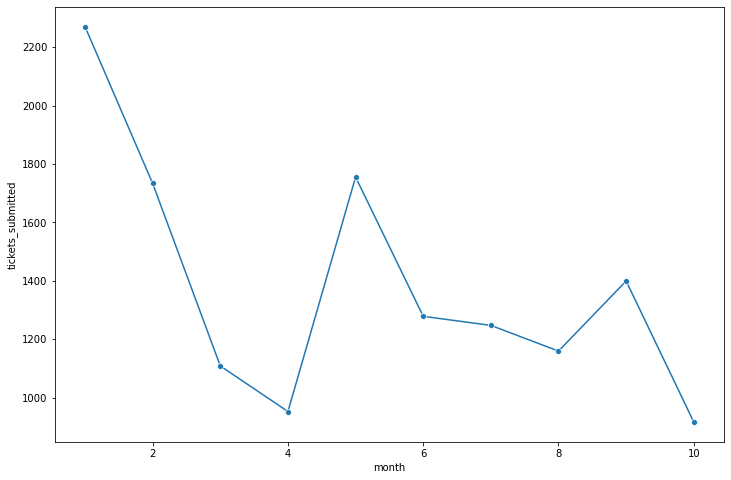

In [304]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(monthly_tickets["month"], monthly_tickets["tickets_submitted"], marker="o")

The number of issues was decreasing monthly from January until May when an unexpected rise was experienced, then it kept decreasing until september again.

In [29]:
top5_resolved = subset_df[subset_df["Resolved by"].isin(["fahad.mubiru","carolyne.kimanthi","nsuuta.nabunje","lilian.maina","Joseph.Achieng"])]

In [52]:
#Checking the top 5 staff who resolve issues on monthly basis
top5_resolved.groupby('month')["Resolved by"].value_counts()

month  Resolved by      
1      Joseph.Achieng       235
       carolyne.kimanthi    186
       fahad.mubiru         176
       lilian.maina         135
2      fahad.mubiru         465
       carolyne.kimanthi     80
       lilian.maina          73
       nsuuta.nabunje        72
       Joseph.Achieng        60
3      fahad.mubiru         129
       carolyne.kimanthi     66
       nsuuta.nabunje        60
       Joseph.Achieng        24
       lilian.maina          12
4      nsuuta.nabunje       121
       fahad.mubiru          38
       carolyne.kimanthi     30
       lilian.maina          25
       Joseph.Achieng        19
5      nsuuta.nabunje       140
       lilian.maina         139
       carolyne.kimanthi     98
       fahad.mubiru          84
       Joseph.Achieng        34
6      carolyne.kimanthi    185
       nsuuta.nabunje        66
       fahad.mubiru          46
       lilian.maina          29
       Joseph.Achieng        22
7      carolyne.kimanthi    140
       fahad.mu

In [53]:
top5_resolved["Resolved by"].value_counts().head()

fahad.mubiru         975
carolyne.kimanthi    933
nsuuta.nabunje       497
lilian.maina         477
Joseph.Achieng       438
Name: Resolved by, dtype: int64

- Majority of the jobs (975 tickets) were resolved by fahad.mubiru within 7 months of his stay, Carolyne.kimanthi also solved 933 tickets in ten months. their experience and skill sets can be used to design the kind of support staff needed to manage several issues.

<AxesSubplot:xlabel='month'>

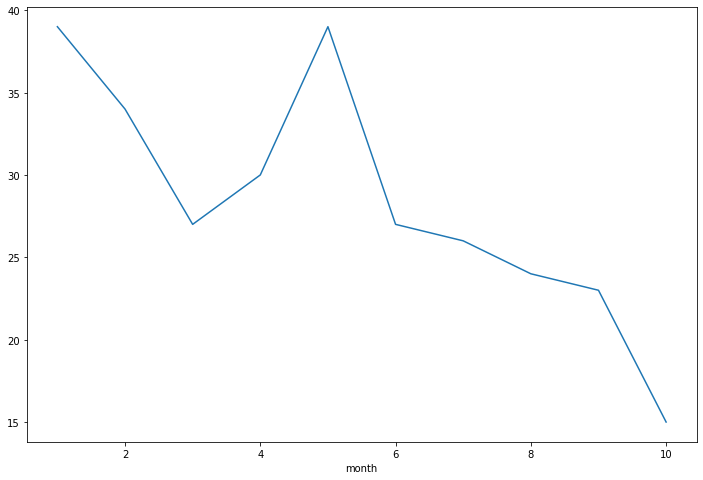

In [406]:
staff = subset_df.groupby("month")["Resolved by"].nunique()


fig, ax = plt.subplots(figsize=(12, 8))
staff.plot()

- The number of staff resolving issues is determined the number of tickets, as tickets keep decreasing, the number of staff keeps decreasing too.
- In may, an unexpected ticket rise was experienced, that resulted to an increase in the number of staff resolving issues. 

In [32]:
#Checking average number of days it takes to resolve a ticket based on Issue Priority
subset_df["Issue Priority"].value_counts()

Priority 2    13497
Priority 4      168
Priority 3       89
Priority 1       54
Name: Issue Priority, dtype: int64

In [33]:
avg_priority_time1 = subset_df.loc[subset_df["Issue Priority"] == "Priority 1"]

In [34]:
np.mean(avg_priority_time1["Date Difference"])

17.14814814814815

In [35]:
avg_priority_time2 = subset_df.loc[subset_df["Issue Priority"] == "Priority 2"]

In [36]:
np.mean(avg_priority_time2["Date Difference"])

22.451804104615842

In [37]:
avg_priority_time3 = subset_df.loc[subset_df["Issue Priority"] == "Priority 3"]

In [38]:
np.mean(avg_priority_time3["Date Difference"])

17.89887640449438

In [39]:
avg_priority_time4 = subset_df.loc[subset_df["Issue Priority"] == "Priority 4"]

In [40]:
np.mean(avg_priority_time4["Date Difference"])

24.928571428571427

- There is really no much significance in the Issue priorities according to the average number of days it takes to solve them, we need to examine what basis are these priority numbers assigned.